In [1]:
import pandas as pd

In [3]:
df_cond = pd.read_csv("conditions.csv")
df_diag = pd.read_csv("diagnosis.csv")

In [4]:
#Merge requirement
report = pd.merge(df_cond,df_diag, on="Patient_ID")

,Patient_ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,764,10,101,76,48,180,32.9,0.171,63,0
764,765,2,122,70,27,0,36.8,0.340,27,0
765,766,5,121,72,23,112,26.2,0.245,30,0
766,767,1,126,60,0,0,30.1,0.349,47,1


In [16]:
# According to the CDC :

#Being overweight (BMI of 25-29.9), or affected by obesity (BMI of 30-39.9) or morbid obesity (BMI of 40 or greater), 
#greatly increases your risk of developing type 2 diabetes. 

#Find the average conditions of people without diabeties diagnosis. group by BMI since it is embodies all the symptoms
(report.query('Outcome != 1').head()).groupby(by=['BMI']).mean()


,Patient_ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
BMI,,,,,,,,,
25.6,6.0,5.0,116.0,74.0,0.0,0.0,0.201,30.0,0.0
26.6,2.0,1.0,85.0,66.0,29.0,0.0,0.351,31.0,0.0
28.1,4.0,1.0,89.0,66.0,23.0,94.0,0.167,21.0,0.0
35.3,8.0,10.0,115.0,0.0,0.0,0.0,0.134,29.0,0.0
37.6,11.0,4.0,110.0,92.0,0.0,0.0,0.191,30.0,0.0


In [17]:
#Find the average conditions of people with diabeties diagnosis. group by BMI since it is embodies all the symptoms
#DATA visualization 1
(report.query('Outcome != 0').head()).groupby(by=['BMI']).mean()

,Patient_ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
BMI,,,,,,,,,
23.3,3.0,8.0,183.0,64.0,0.0,0.0,0.672,32.0,1.0
30.5,9.0,2.0,197.0,70.0,45.0,543.0,0.158,53.0,1.0
31.0,7.0,3.0,78.0,50.0,32.0,88.0,0.248,26.0,1.0
33.6,1.0,6.0,148.0,72.0,35.0,0.0,0.627,50.0,1.0
43.1,5.0,0.0,137.0,40.0,35.0,168.0,2.288,33.0,1.0


In [18]:
df_cond = pd.read_csv("conditions.csv")
df_diag = pd.read_csv("diagnosis.csv")

In [29]:
#describe the conditions of patients with diabetic diagnosis
#DATA visualization 2
diabetic = report.query('Outcome == 1').head()
adjusted = diabetic.drop(['Outcome','Patient_ID'], axis = 1)

adjusted.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000
mean,3.800000,148.600000,59.200000,29.400000,159.8000,32.300000,0.798600,38.800000
std,3.193744,46.489784,13.754999,17.155174,225.3535,7.145978,0.862745,11.945711
min,0.000000,78.000000,40.000000,0.000000,0.0000,23.300000,0.158000,26.000000
25%,2.000000,137.000000,50.000000,32.000000,0.0000,30.500000,0.248000,32.000000
50%,3.000000,148.000000,64.000000,35.000000,88.0000,31.000000,0.627000,33.000000
75%,6.000000,183.000000,70.000000,35.000000,168.0000,33.600000,0.672000,50.000000
max,8.000000,197.000000,72.000000,45.000000,543.0000,43.100000,2.288000,53.000000


In [34]:
# Insulin and Glucose have the highest std for diabetics
#Data visualization 3
#Lets check it out on a graph
# Insulin vs BMI
import plotly.express as px
fig = px.scatter(x=df_cond["Insulin"], y=df_cond["BMI"])
fig.update_layout(
    height=800,
    title_text='Insulin vs BMI'
)
fig = px.scatter(df_cond, x="Insulin", y="BMI",  log_x=True, size_max=60)


fig.show()


In [38]:
# graph has alot of clusters so lets use histograms to better visualize
#Visualization 4
fig = px.box(df_cond, x="Insulin", y="BMI")
fig.show()

In [35]:
#Lets try glucose and BMI
# Data visualization 5
import plotly.express as px
fig = px.scatter(x=df_cond["Glucose"], y=df_cond["BMI"])
fig.update_layout(
    height=800,
    title_text='Glucose VS BMI '
)
fig = px.scatter(df_cond, x="Glucose", y="BMI",  log_x=True, size_max=60)


fig.show()

In [36]:
#Create heatmap to find out which conditions are correlated
#Visualization 6
correlation_matrix = df_cond.corr()
fig = px.imshow(correlation_matrix, text_auto=True)
fig.show()
# Except for age& pregnancies, all other conditions have a corr < 0.5 so they can be used as unbiased predictors of diabeties


In [53]:
#Machine Learning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [46]:
# read data 
df_cond = pd.read_csv("conditions.csv")
df_diag = pd.read_csv("diagnosis.csv")
report = pd.merge(df_cond,df_diag, on="Patient_ID")
report.to_csv('report.csv')
#
df_train = pd.read_csv('train.csv')
df_train.head()


,Unnamed: 0,Patient_ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,1,6,148,72,35,0,33.6,0.627,50,1
1,1,2,1,85,66,29,0,26.6,0.351,31,0
2,2,3,8,183,64,0,0,23.3,0.672,32,1
3,3,4,1,89,66,23,94,28.1,0.167,21,0
4,4,5,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df_train = df_train[["Outcome", "Glucose", "BloodPressure", "SkinThickness", "Insulin",'BMI','DiabetesPedigreeFunction']]
df_train.describe(include="all")

,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.347471,120.473083,68.504078,20.644372,80.430669,31.889396,0.480532
std,0.476556,32.724609,19.618554,15.968437,116.694103,7.981744,0.336758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,0.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000
50%,0.000000,116.000000,70.000000,23.000000,37.000000,32.000000,0.385000
75%,1.000000,141.000000,80.000000,32.000000,126.000000,36.500000,0.647000
max,1.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000


In [50]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_train.head()

,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,1,148,72,35,0,33.6,0.627
1,0,85,66,29,0,26.6,0.351
2,1,183,64,0,0,23.3,0.672
3,0,89,66,23,94,28.1,0.167
4,1,137,40,35,168,43.1,2.288


In [51]:
df_train = (df_train - df_train.mean())/df_train.std()
df_train.head()

,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,1.369259,0.841169,0.178195,0.899000,-0.689244,0.214315,0.434936
1,-0.729131,-1.083988,-0.127638,0.523259,-0.689244,-0.662687,-0.384643
2,1.369259,1.910700,-0.229583,-1.292824,-0.689244,-1.076130,0.568562
3,-0.729131,-0.961756,-0.127638,0.147518,0.116281,-0.474758,-0.931029
4,1.369259,0.505030,-1.452914,0.899000,0.750418,1.404531,5.367255


In [54]:
mykmeans = KMeans(n_clusters=3).fit(df_train)
mykmeans.labels_

array([2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1,
       1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0,

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

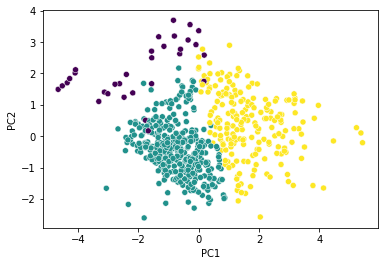

In [55]:
mypca = PCA(n_components=2)
myscores = mypca.fit_transform(df_train)

myscores = pd.DataFrame(myscores, columns=["PC1", "PC2"])
sns.scatterplot(data=myscores,
                x="PC1", 
                y="PC2", 
                c=mykmeans.labels_)

In [56]:
myloadings = pd.DataFrame(mypca.components_.T, 
             index=df_train.columns,
             columns=["PC1","PC2"])
myloadings

,PC1,PC2
Outcome,0.384943,0.539488
Glucose,0.409584,0.490498
BloodPressure,0.260137,-0.356105
SkinThickness,0.400629,-0.535378
Insulin,0.427559,-0.132885
BMI,0.436285,-0.166596
DiabetesPedigreeFunction,0.287632,0.097525


In [57]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [58]:
# Read train
train_data = pd.read_csv("train.csv",
                     sep=",",  # delimiter
                     header=0, # header in first row
                     index_col=0 # ids in first column
                     )
# Read Test
test_data = pd.read_csv("test.csv",
                     sep=",",  # delimiter
                     header=0, # header in first row
                     index_col=0 # ids in first column
                     )

In [59]:
train_data.describe(include="all")

,Patient_ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,307.000000,3.797716,120.473083,68.504078,20.644372,80.430669,31.889396,0.480532,33.208809,0.347471
std,177.102136,3.347743,32.724609,19.618554,15.968437,116.694103,7.981744,0.336758,11.778822,0.476556
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,154.000000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,307.000000,3.000000,116.000000,70.000000,23.000000,37.000000,32.000000,0.385000,29.000000,0.000000
75%,460.000000,6.000000,141.000000,80.000000,32.000000,126.000000,36.500000,0.647000,40.000000,1.000000
max,613.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
test_data.describe(include="all")

,Patient_ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,691.000000,4.032258,122.561290,71.483871,20.109677,77.303226,32.400645,0.437645,33.367742,0.354839
std,44.888751,3.459261,28.845104,18.145285,15.932311,109.649286,7.496722,0.307568,11.723558,0.480015
min,614.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.115000,21.000000,0.000000
25%,652.500000,1.000000,102.000000,62.000000,0.000000,0.000000,27.850000,0.226500,23.500000,0.000000
50%,691.000000,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.340000,28.000000,0.000000
75%,729.500000,6.000000,139.000000,81.000000,32.000000,130.000000,36.700000,0.576000,42.000000,1.000000
max,768.000000,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


In [61]:
predictors = ["Glucose",
              "BloodPressure",  
              "SkinThickness",  
              "Insulin",  
              "BMI",  
              "DiabetesPedigreeFunction"]

X_train = pd.get_dummies(train_data[predictors],
               drop_first=True)
y_train = train_data["Outcome"]

X_test = pd.get_dummies(test_data[predictors],
               drop_first=True)

In [62]:
train_means = X_train.mean()

X_train = X_train.fillna(train_means)
X_test = X_test.fillna(train_means)

In [63]:
my_lr = LogisticRegression(max_iter=400).fit(X_train, y_train)
lr_pred_train = my_lr.predict(X_train)
metrics.accuracy_score(y_train, lr_pred_train)

0.7781402936378466

In [64]:
metrics.confusion_matrix(y_train, lr_pred_train)

array([[355,  45],
       [ 91, 122]], dtype=int64)

In [65]:
lr_pred_test = my_lr.predict(X_test)

In [66]:
lr_output = pd.DataFrame(lr_pred_test,
                      index=X_test.index,
                      columns=["Survived"])
lr_output.to_csv("lr_pred.csv")

In [67]:
my_tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_pred_train = my_tree.predict(X_train)
metrics.accuracy_score(y_train, tree_pred_train)

1.0

In [68]:
pd.DataFrame(metrics.confusion_matrix(y_train, tree_pred_train, normalize="true"))

,0,1
0,1.0,0.0
1,0.0,1.0


In [69]:
tree_pred_test = my_tree.predict(X_test)

In [70]:
tree_output = pd.DataFrame(tree_pred_test,
                      index=X_test.index,
                      columns=["Outcome"])
tree_output.to_csv("tree_pred.csv")